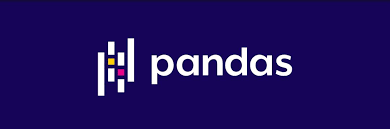

# Linea de tiempo 
2008: Inicio de desarrollo de pandas

2009: pandas se convirtio de libre acceso

2012: Primera edicion para Python 

2015: pandas se convierte en un objeto NumFOCUS con mucho soporte

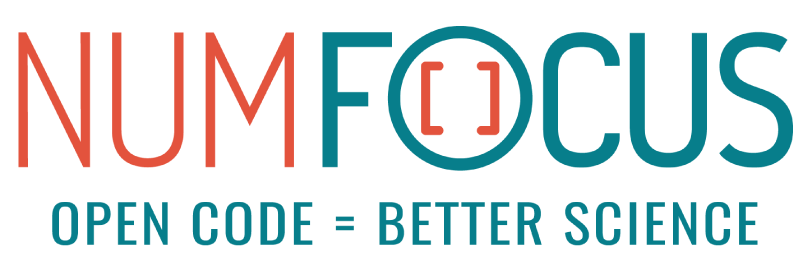


Para poder entender pandas se requiere conocer dos tipos de estructuras:

1. Series
2. DataFrame
3. Panel 


Data structure  | Dimensionalidad | Analogo Excel 
-------------------|-------------------|------------------
Series       | 1D |Columna 
Dataframe       | 2D | Hoja de calculo
Panel       | 3D |Hojas de calculo multiples

Las estructuras mas comunes son **Series** y **DataFrame** 

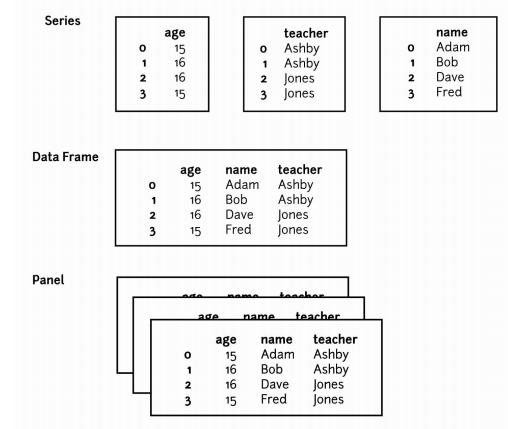




# Series

Se usan para modelar estrcturas 1D similar a las listas en Python aunque tienen mayor numero de bits incluyendo indice y nombre. 

Pueden albergar strings, floats, booleans

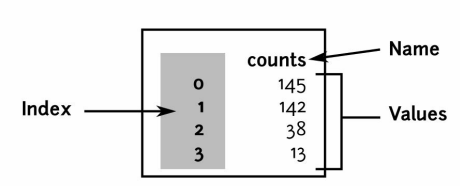

In [ ]:
pd.Series?

In [10]:
import pandas as pd
david = pd.Series(data=[145, 142, 38, 13],name='counts')
print(type(david))
david

<class 'pandas.core.series.Series'>


0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [ ]:
print(david.index)
print(david.values)

RangeIndex(start=0, stop=4, step=1)
[145 142  38  13]


In [ ]:
# EL indice no necesariamente tiene que se un numero 
david3 = pd.Series(data=[145, 142, 38, 13],name='counts',\
                   index=['Juan', 'Pedro', 'Sofia', 'Andrea'])
print(david3)
print('----')
print(david3.values)
print('----')
print(david3.index)

Juan      145
Pedro     142
Sofia      38
Andrea     13
Name: counts, dtype: int64
----
[145 142  38  13]
----
Index(['Juan', 'Pedro', 'Sofia', 'Andrea'], dtype='object')


In [ ]:
david3['Juan']

145

In [ ]:
# Tambien pueden albergar diferentes objetos 
class J:
   pass
pedro = pd.Series(['David', 'Fran', 13, J()],\
                    name='JJ')
pedro

0                                    David
1                                     Fran
2                                       13
3    <__main__.J object at 0x7f1cb00a3f10>
Name: JJ, dtype: object

In [ ]:
# Y que hay de los nulos
nan_ser = pd.Series([2, None,3,4,None],index=['O', 'C','D','F','A'])
print(nan_ser)
'''
Fijarse que aparece float y es porque los NAN solo pueden estar
en este tipo de dato''' 
nan_ser.count()# Elementos no nulos
print(len(nan_ser))
print(nan_ser.count())
print('Valores nulos',len(nan_ser)-nan_ser.count())

O    2.0
C    NaN
D    3.0
F    4.0
A    NaN
dtype: float64
5
3
Valores nulos 2


In [ ]:
%%time
lista=[2, None,3,4,None]
lista.append(2)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


In [ ]:
%%time 
nan_ser = pd.Series([2, None,3,4,None])

CPU times: user 442 µs, sys: 0 ns, total: 442 µs
Wall time: 453 µs


El objeto **Series** es mucho mas rapido , consume menos meoria y tiene mas metodos que una lista. 

Tambien tiene muchas similitudes con **Numpy array**

# Proceso CLAB (Creacion, Lectura, Actualizacion, Borrado) 



In [ ]:
# 1) Creacion
cidys = pd.Series([10, 7, 1, 22],\
                        index=['1968', '1969', '1970', '1970'],\
                        name='Per')
print(cidys)
print('---')
# Que hay si necesito guardar multiples entradas en mi serie
g2 = pd.Series({'1969': 7, '1970': [1, 22]},index=['1969', '1970', '1970'])
print(g2)

# 2) Lectura
print('--------------------')
print(cidys['1970'])
print('--------------------')
# Procesos iterativos
print('--------------------')
for i in cidys:
  print(i)

1968    10
1969     7
1970     1
1970    22
Name: Per, dtype: int64
---
1969          7
1970    [1, 22]
1970    [1, 22]
dtype: object
--------------------
1970     1
1970    22
Name: Per, dtype: int64
--------------------
--------------------
10
7
1
22


In [ ]:
#print(22 in cidys) # Incorrecto
#print(22 in set(cidys))
print(23 in cidys.values)
print('1968' in cidys.index) # Ojo aqui funciona para el index
# Se pueden hacer iteraciones sobre tuplas index, valor
print('------')
for item in cidys.iteritems():
  print(item)

False
True
------
('1968', 10)
('1969', 7)
('1970', 1)
('1970', 22)


In [ ]:
cidys

1968    10
1969     7
1970     1
1970    22
Name: Per, dtype: int64

In [ ]:
# 3) Actualizacion
print(cidys)
cidys['1969'] = 6
print(cidys['1969'])
# Que pasa cuando intento actualizar un indice duplicado 
cidys['1970'] = 2
print('--------')
print(cidys)
cidys = pd.Series([10, 7, 1, 22],\
                        index=['1968', '1969', '1970', '1970'],\
                        name='Per')
# En esos casos es mejor hacer lo siguiente:
cidys.iloc[3] = 2
print(cidys)

1968    10
1969     7
1970     1
1970     2
Name: Per, dtype: int64
6
--------
1968    10
1969     6
1970     2
1970     2
Name: Per, dtype: int64
1968    10
1969     7
1970     1
1970     2
Name: Per, dtype: int64


In [ ]:
cidys

1968    10
1969     7
1970     1
1970     2
Name: Per, dtype: int64

In [ ]:
# Se pueden agregar valores a la serie:
cidys=cidys.append(pd.Series({'1967':10}))
print(cidys)

1968    10
1969     6
1970     2
1970     2
1967    10
dtype: int64


In [ ]:
# Borrado 
del cidys['1968']
#print(cidys)
# Tambien se pueden hacer filtros 
cidys[cidys <= 2]

1970    1
1970    2
dtype: int64

In [ ]:
# Tambien se pueden hacer filtros 
cidys[cidys <= 2]

1970    2
1970    2
dtype: int64

# Indexamiento de series

El atributo .iloc sirve para encontrar la posicion de los indices

Por el contrario .loc permite encontrar los labels en el indice

In [ ]:
print(cidys)

1969     6
1970     2
1970     2
1967    10
dtype: int64


In [ ]:
print(cidys.iloc[0])
print('-----')
print(cidys.iloc[-1])
# Proceso de slice
print('-------------')
print(cidys.iloc[0:3]) # 0=:3-1
print(cidys.iloc[[0,2]]) # Devuelve una lista

7
-----
10
-------------
1969    7
1970    1
1970    2
dtype: int64
1969    7
1970    2
dtype: int64


In [ ]:
cidys.loc['1969']

6

Existen otros metodos llamados **.at y .iat** que son los analodos a **.loc y .iloc** solo que devuelven como resultado un objeto **numpy.ndarray**


In [ ]:
cidys.at['1970']

1970    2
1970    2
dtype: int64

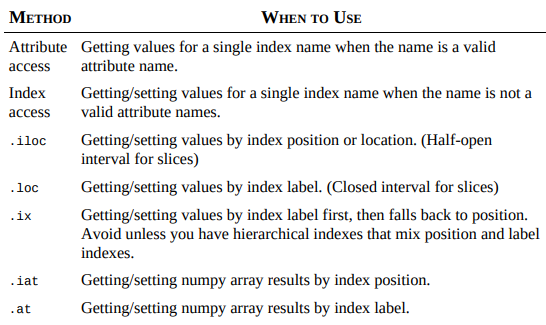

Algunos ejemplos de slice

Slice  | Resultado
-------------------|------------------
0:1       | Primer item 
:1       | Primer item (empieza en 0)
:-2       | Desde el ultimo valor hasta el penultimo
::2       | Toma desde inicio y fin haciendo seleccion cada 2 elementos



In [ ]:
cidys

1969     6
1970     2
1970     2
1967    10
dtype: int64

In [ ]:
print(cidys)

print(cidys.iloc[0:2]) # 
print(cidys.iloc[::3]) # 
print(cidys.iloc[:-2]) # 

1969     6
1970     2
1970     2
1967    10
dtype: int64
1969    6
1970    2
dtype: int64
1969     6
1967    10
dtype: int64
1969    6
1970    2
dtype: int64


In [ ]:
m = cidys > 7
m

1969    False
1970    False
1970    False
1967     True
dtype: bool

In [ ]:
# Creacion de masks
mask = cidys > 7
print(mask)
# En general cuando se aplica cualquier operacion a todos los
#elementos de una serie esto se conoce como BROADCASTING
cidys +2 # Otro ejemplo de broadcasting

1969    False
1970    False
1970    False
1974     True
1967     True
dtype: bool


1969     9
1970     3
1970     4
1974    11
1967    12
dtype: int64

In [ ]:
# Con los masks se pueden aplicar filtros
cidys[~(cidys>10)]

1969     6
1970     2
1970     2
1967    10
dtype: int64

Se pueden aplicar diversas operaciones logicas

Operacion  | Ejemplo
-------------------|------------------
And       | ser[a & b]
Or       | ser[a | b]
Not       | ser[~a]




In [ ]:
cidys

1969     7
1970     1
1970     2
1974     9
1967    10
dtype: int64

In [ ]:
# Porque tenemos resultados diferentes 
print(cidys)
print('-----------')
print(cidys[(cidys > 7) | (cidys <= 2)])
print('-----------')
print(cidys[(cidys > 7) & (cidys <= 2)])

1969     6
1970     2
1970     2
1967    10
dtype: int64
-----------
1970     2
1970     2
1967    10
dtype: int64
-----------
Series([], dtype: int64)


# Metodos de Series

In [ ]:
import pandas as pd
juan = pd.Series([3, None , 11, 9],\
                 index=['David', 'Pedro', 'Ju', 'Lin'],\
                 name='Counts')

juan2 = pd.Series([5, None , 15, 21],\
                     index=['David', 'Pedro', 'Ju', 'Lin'],\
                     name='Counts')
# Procesos iterativos
for value in juan: 
  print(value)


3.0
nan
11.0
9.0


In [ ]:
juan

David     3.0
Pedro     NaN
Ju       11.0
Lin       9.0
Name: Counts, dtype: float64

In [ ]:
for idx, value in juan.iteritems():
  print(idx, value)


David 3.0
Pedro nan
Ju 11.0
Lin 9.0


In [ ]:
for idx in juan.keys():
  print(idx)

David
Pedro
Ju
Lin


In [ ]:
print(juan.get('David'))
print(juan.David)

3.0
3.0


In [ ]:
# Uso de counts
jj = pd.Series([67.3, 100, 96.7, None, 100],\
               index=['R', 'P', 'B', 'B', 'B'],\
               name='test2')
print(jj)

R     67.3
P    100.0
B     96.7
B      NaN
B    100.0
Name: test2, dtype: float64


In [ ]:
print(jj.count())
print('----')
print(jj.value_counts())
print('----')
print(jj.unique())
print('----')
print(jj.drop_duplicates())
print('----')
print(jj.duplicated())

4
----
100.0    2
96.7     1
67.3     1
Name: test2, dtype: int64
----
[ 67.3 100.   96.7   nan]
----
R     67.3
P    100.0
B     96.7
B      NaN
Name: test2, dtype: float64
----
R    False
P    False
B    False
B    False
B     True
Name: test2, dtype: bool


In [ ]:
jj

R     67.3
P    100.0
B     96.7
B      NaN
B    100.0
Name: test2, dtype: float64

In [ ]:
print(jj.groupby(jj.index).first())
print('-----------')
print(jj.groupby(jj.index).last())

B     96.7
P    100.0
R     67.3
Name: test2, dtype: float64
-----------
B    100.0
P    100.0
R     67.3
Name: test2, dtype: float64


In [ ]:
jj

R     67.3
P    100.0
B     96.7
B      NaN
B    100.0
Name: test2, dtype: float64

In [ ]:
# Funciones estadisticas
print(jj.mean())
print(jj.median())
print(jj.quantile())
print(jj.quantile(0.1))
print(jj.quantile(0.9))
print('------------')
print(jj.describe())
print('-----------')
print(jj.describe(percentiles=[0.05,0.1,0.2]))
print('------------')
print(jj.min())
print('------------')
print(jj.idxmin())
print('------------')
print(jj.max())
print('------------')
print(jj.idxmax())



91.0
98.35
98.35
76.12
100.0
------------
count      4.000000
mean      91.000000
std       15.876398
min       67.300000
25%       89.350000
50%       98.350000
75%      100.000000
max      100.000000
Name: test2, dtype: float64
-----------
count      4.000000
mean      91.000000
std       15.876398
min       67.300000
5%        71.710000
10%       76.120000
20%       84.940000
50%       98.350000
max      100.000000
Name: test2, dtype: float64
------------
67.3
------------
R
------------
100.0
------------
P


------------
252.06000000000006
------------
15.876397576276554
------------
11.850000000000001
------------
-1.9439329105552396
------------
3.7963553468668323
------------
nan
------------
R     67.3
P    167.3
B    264.0
B      NaN
B    364.0
Name: test2, dtype: float64
------------
R          67.3
P        6730.0
B      650791.0
B           NaN
B    65079100.0
Name: test2, dtype: float64


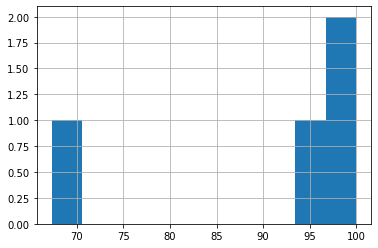

In [ ]:
print('------------')
print(jj.var())
print('------------')
print(jj.std())
print('------------')
print(jj.mad())
print('------------')
print(jj.skew())
print('------------')
print(jj.kurt())
print('------------')
print(jj.corr(juan2))
print('------------')
print(jj.cumsum())
print('------------')
print(jj.cumprod())
jj.hist()

In [ ]:
# Fechas
pd.to_datetime(pd.Series(['Sep 7, 2001','9/8/2001', '9-9-2001',\
                          '10th of September 2001','Once de Septiembre 2001']),\
                errors='coerce')

0   2001-09-07
1   2001-09-08
2   2001-09-09
3   2001-09-10
4          NaT
dtype: datetime64[ns]

In [ ]:
jj

R     67.3
P    100.0
B     96.7
B      NaN
B    100.0
Name: test2, dtype: float64

In [ ]:
# Lidiar con Nas
print(jj.fillna(-1))
print(jj.dropna())
val_mask = jj.notnull()
val_mask
jj[val_mask]

R     67.3
P    100.0
B     96.7
B     -1.0
B    100.0
Name: test2, dtype: float64
R     67.3
P    100.0
B     96.7
B    100.0
Name: test2, dtype: float64


R     67.3
P    100.0
B     96.7
B    100.0
Name: test2, dtype: float64

In [ ]:
jj

R     67.3
P    100.0
B     96.7
B      NaN
B    100.0
Name: test2, dtype: float64

In [ ]:
# Sorting
orig = jj.copy()
print(orig.sort_values())
print(orig.sort_values(ascending=False))
print(orig.sort_index())
print(orig.sort_index(ascending=False))
#print(orig.rank())

R     67.3
B     96.7
P    100.0
B    100.0
B      NaN
Name: test2, dtype: float64
B    100.0
P    100.0
B     96.7
R     67.3
B      NaN
Name: test2, dtype: float64
B     96.7
B      NaN
B    100.0
P    100.0
R     67.3
Name: test2, dtype: float64
R     67.3
P    100.0
B     96.7
B      NaN
B    100.0
Name: test2, dtype: float64


In [ ]:
# Aplicando funciones
def format(x): 
  if x == 1:
    template = '{} David'
  else:
    template = '{} David'
  return template.format(x)
jj.map(format)

R     67.3 David
P    100.0 David
B     96.7 David
B      nan David
B    100.0 David
Name: test2, dtype: object

In [ ]:
# Operaciones con strings
nombres = pd.Series(['Jorge', 'John', 'Paula'])
print(nombres.str.lower())
print(nombres.str.findall('Jor'))

0    jorge
1     john
2    paula
dtype: object
0    [Jor]
1       []
2       []
dtype: object


In [ ]:
print(nombres.str.lower())

0    jorge
1     john
2    paula
dtype: object


In [ ]:
print(nombres.str.upper())

0    JORGE
1     JOHN
2    PAULA
dtype: object


In [ ]:
print(nombres.str.findall('Jorge'))

0    [Jorge]
1         []
2         []
dtype: object


# Dataframes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = np.array([['', "col1", "col2","col3","col4"], 
                 ["row1",11,22,33,44],
                 ["row2",55,66,77,88],
                 ["row3",99,1010,1111,1212],
                 ["row4",1313,1414,1515,1616]])

In [ ]:
data[0,1:]

array(['col1', 'col2', 'col3', 'col4'], dtype='<U4')

In [ ]:
data[1:,1:]

array([['11', '22', '33', '44'],
       ['55', '66', '77', '88'],
       ['99', '1010', '1111', '1212'],
       ['1313', '1414', '1515', '1616']], dtype='<U4')

In [ ]:
# data = all data | index = col 0 | columns = row 0 
df = pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])

In [ ]:
print(df)
print(df.shape) # Forma
df['col1']['row1'] # coordenadas 

      col1  col2  col3  col4
row1    11    22    33    44
row2    55    66    77    88
row3    99  1010  1111  1212
row4  1313  1414  1515  1616
(4, 4)


'11'

In [ ]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
# DataFrame = Matrix
df2 = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]))
print(df2)
print(df2.shape)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
(3, 3)


In [ ]:
# Serie = data group by variables
series = pd.Series({"Argentina": "Buenos Aires", "Chile": "Santiago de Chile", "Colombia": "Bogotá", "Peru":"Lima", "Venezuela":"Caracas", "Mexico":"Mexico D.F."})

In [ ]:
print(series)
print(series.shape)

Argentina         Buenos Aires
Chile        Santiago de Chile
Colombia                Bogotá
Peru                      Lima
Venezuela              Caracas
Mexico             Mexico D.F.
dtype: object
(6,)


In [ ]:
series2 = pd.Series({"Argentina": ["Buenos Aires", "Rosario", "La Plata"], "Chile": "Santiago de Chile", "Colombia": ["Bogotá", "Medellin", "Cali"], "Peru":"Lima", "Venezuela":"Caracas", "Mexico":"Mexico D.F."})

In [ ]:
print(series2)
print(series2.shape)

Argentina    [Buenos Aires, Rosario, La Plata]
Chile                        Santiago de Chile
Colombia              [Bogotá, Medellin, Cali]
Peru                                      Lima
Venezuela                              Caracas
Mexico                             Mexico D.F.
dtype: object
(6,)


In [ ]:
df3 = pd.DataFrame(np.array([[1,2,3,4,5], [6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]))
df3

,0,1,2,3,4
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20
4,21,22,23,24,25


In [ ]:
print(len(df3.index)) # index of dataframe
print(len(df3.columns)) # Columns of dataframe

5
5


In [ ]:
df3.shape

(5, 5)

In [ ]:
# Show statistics of my data
df3.describe()

,0,1,2,3,4
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,11.000000,12.000000,13.000000,14.000000,15.000000
std,7.905694,7.905694,7.905694,7.905694,7.905694
min,1.000000,2.000000,3.000000,4.000000,5.000000
25%,6.000000,7.000000,8.000000,9.000000,10.000000
50%,11.000000,12.000000,13.000000,14.000000,15.000000
75%,16.000000,17.000000,18.000000,19.000000,20.000000
max,21.000000,22.000000,23.000000,24.000000,25.000000


In [ ]:
df4 = pd.DataFrame(np.random.randint(0,50,size=(100,5)))

In [ ]:
df4.shape

(100, 5)

In [ ]:
df4.describe()

,0,1,2,3,4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,24.260000,25.970000,27.440000,21.370000,24.100000
std,13.388235,14.165298,15.671708,15.177505,15.201342
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,13.000000,12.000000,7.000000,11.750000
50%,24.000000,27.500000,30.000000,21.000000,24.000000
75%,37.000000,38.000000,42.250000,35.250000,37.250000
max,49.000000,49.000000,49.000000,49.000000,49.000000


In [ ]:
df4.corr()

,0,1,2,3,4
0,1.000000,-0.241394,0.097418,-0.104421,-0.091799
1,-0.241394,1.000000,0.006339,-0.143386,0.097210
2,0.097418,0.006339,1.000000,-0.336560,-0.011295
3,-0.104421,-0.143386,-0.336560,1.000000,0.002771
4,-0.091799,0.097210,-0.011295,0.002771,1.000000


In [ ]:
df4.count() # Count of not null elements

0    100
1    100
2    100
3    100
4    100
dtype: int64

In [ ]:
df4.max() # Max Value

0    49
1    49
2    49
3    49
4    49
dtype: int64

In [ ]:
df4.min() # Min value

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
df4.mean() # Mean of all data

0    24.26
1    25.97
2    27.44
3    21.37
4    24.10
dtype: float64

In [ ]:
df4.std() # Standard Deviation

0    13.388235
1    14.165298
2    15.671708
3    15.177505
4    15.201342
dtype: float64

In [ ]:
df4.median() # Middle Value

0    24.0
1    27.5
2    30.0
3    21.0
4    24.0
dtype: float64

In [ ]:
df4[0] # Column

0     28
1      6
2     37
3      4
4     10
      ..
95     1
96    13
97     3
98    20
99    33
Name: 0, Length: 100, dtype: int64

In [ ]:
df4[[0,2,4]] # Two or more Columns

,0,2,4
0,28,5,12
1,6,33,20
2,37,12,29
3,4,48,45
4,10,23,19
...,...,...,...
95,1,18,18
96,13,42,14
97,3,48,40
98,20,9,42


In [ ]:
df4.head()

,0,1,2,3,4
0,28,38,5,14,12
1,6,44,33,26,20
2,37,36,12,44,29
3,4,36,48,1,45
4,10,19,23,28,19


In [ ]:
df4.iloc[0][2] # same as M[0,2] Row 0 column 2

5

In [ ]:
df4.loc[0] # Row 0 all columns

0    28
1    38
2     5
3    14
4    12
Name: 0, dtype: int64

In [ ]:
df4.iloc[0,:] # Row 0 all 

0    28
1    38
2     5
3    14
4    12
Name: 0, dtype: int64

In [ ]:
df4.iloc[0,:] = [None,None,None,None,None]

In [ ]:
df4

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,6.0,44.0,33.0,26.0,20.0
2,37.0,36.0,12.0,44.0,29.0
3,4.0,36.0,48.0,1.0,45.0
4,10.0,19.0,23.0,28.0,19.0
...,...,...,...,...,...
95,1.0,45.0,18.0,9.0,18.0
96,13.0,29.0,42.0,42.0,14.0
97,3.0,22.0,48.0,7.0,40.0
98,20.0,7.0,9.0,15.0,42.0


In [ ]:
df4.isnull()

,0,1,2,3,4
0,True,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [ ]:
df4.isnull().sum()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [ ]:
# pd.dropna() # remove all nan data

In [ ]:
# df4.dropna(axis=1) # Columns

In [ ]:
df4.fillna('ND')

,0,1,2,3,4
0,10.0,10.0,10.0,10.0,10.0
1,6.0,44.0,33.0,26.0,20.0
2,37.0,36.0,12.0,44.0,29.0
3,4.0,36.0,48.0,1.0,45.0
4,10.0,19.0,23.0,28.0,19.0
...,...,...,...,...,...
95,1.0,45.0,18.0,9.0,18.0
96,13.0,29.0,42.0,42.0,14.0
97,3.0,22.0,48.0,7.0,40.0
98,20.0,7.0,9.0,15.0,42.0


# DataSets

# Metodo 1 (Api)

In [ ]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
# Traerlo de Github

--2021-12-02 00:45:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2021-12-02 00:45:47 (237 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [ ]:
filename = 'cars_clus.csv'
#Lectura
pdf = pd.read_csv(filename)
print ("Shape: ", pdf.shape)
pdf.head(10)

Shape:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0
6,Audi,A8,1.380,39.000,0.000,62.000,4.200,310.000,113.000,74.000,198.200,3.902,23.700,21.000,0.322,0.0
7,BMW,323i,19.747,$null$,0.000,26.990,2.500,170.000,107.300,68.400,176.000,3.179,16.600,26.100,2.983,0.0
8,BMW,328i,9.231,28.675,0.000,33.400,2.800,193.000,107.300,68.500,176.000,3.197,16.600,24.000,2.223,0.0
9,BMW,528i,17.527,36.125,0.000,38.900,2.800,193.000,111.400,70.900,188.000,3.472,18.500,24.800,2.864,0.0


#Metodo 2 (Local)

In [18]:
from google.colab import files
uploaded = files.upload()

Saving pokemon_data.csv to pokemon_data (2).csv


In [19]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['pokemon_data.csv']),sep=",")
df2.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [20]:
type(df2)

pandas.core.frame.DataFrame

In [21]:
df2.shape

(800, 12)

In [25]:
df2.head(2)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


In [27]:
df2.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


#Metodo 3 (Desde Drive)

In [31]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
#import os
#print(os.getcwd())
#os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive


In [34]:
# Mi cuenta personal
%cd '/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 2'

/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 2


In [36]:
%%time
import pandas as pd
pk = pd.read_csv('pokemon_data.csv',sep=",")

CPU times: user 7.66 ms, sys: 925 µs, total: 8.59 ms
Wall time: 305 ms


In [37]:
pk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [38]:
pk.head(2) # show the first elements

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


In [39]:
pk.tail(1) # show the last elements

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [40]:
pk.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [41]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [42]:
pk.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

# Excel

In [43]:
%%time
pk_excel = pd.read_excel('pokemon_data.xlsx')
#type(pk)

CPU times: user 342 ms, sys: 27 ms, total: 369 ms
Wall time: 914 ms


In [44]:
pk_excel.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [45]:
pk_excel.tail(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


# TXT

In [46]:
%%time
pk_txt = pd.read_csv('pokemon_data.txt')

CPU times: user 2.62 ms, sys: 4.34 ms, total: 6.95 ms
Wall time: 307 ms


In [47]:
pk_txt.head(3)

,#\tName\tType 1\tType 2\tHP\tAttack\tDefense\tSp. Atk\tSp. Def\tSpeed\tGeneration\tLegendary
0,1\tBulbasaur\tGrass\tPoison\t45\t49\t49\t65\t6...
1,2\tIvysaur\tGrass\tPoison\t60\t62\t63\t80\t80\...
2,3\tVenusaur\tGrass\tPoison\t80\t82\t83\t100\t1...


In [ ]:
pk_txt.tail(3)

,#\tName\tType 1\tType 2\tHP\tAttack\tDefense\tSp. Atk\tSp. Def\tSpeed\tGeneration\tLegendary
797,720\tHoopaHoopa Confined\tPsychic\tGhost\t80\t...
798,720\tHoopaHoopa Unbound\tPsychic\tDark\t80\t16...
799,721\tVolcanion\tFire\tWater\t80\t110\t120\t130...


In [48]:
pk_txt = pd.read_csv('pokemon_data.txt', delimiter='\t')

In [49]:
pk_txt.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [50]:
pk.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [51]:
pk.index

RangeIndex(start=0, stop=800, step=1)

In [52]:
pk.values

array([[1, 'Bulbasaur', 'Grass', ..., 45, 1, False],
       [2, 'Ivysaur', 'Grass', ..., 60, 1, False],
       [3, 'Venusaur', 'Grass', ..., 80, 1, False],
       ...,
       [720, 'HoopaHoopa Confined', 'Psychic', ..., 70, 6, True],
       [720, 'HoopaHoopa Unbound', 'Psychic', ..., 80, 6, True],
       [721, 'Volcanion', 'Fire', ..., 70, 6, True]], dtype=object)

In [53]:
pk['Name'][0:10]

0                    Bulbasaur
1                      Ivysaur
2                     Venusaur
3        VenusaurMega Venusaur
4                   Charmander
5                   Charmeleon
6                    Charizard
7    CharizardMega Charizard X
8    CharizardMega Charizard Y
9                     Squirtle
Name: Name, dtype: object

In [54]:
pk[['Name','Type 1']]

,Name,Type 1
0,Bulbasaur,Grass
1,Ivysaur,Grass
2,Venusaur,Grass
3,VenusaurMega Venusaur,Grass
4,Charmander,Fire
...,...,...
795,Diancie,Rock
796,DiancieMega Diancie,Rock
797,HoopaHoopa Confined,Psychic
798,HoopaHoopa Unbound,Psychic


In [60]:
pk[(pk['Type 1']== 'Grass') | (pk['Type 1']== 'Rock')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
768,698,Amaura,Rock,Ice,77,59,50,67,63,46,6,False
769,699,Aurorus,Rock,Ice,123,77,72,99,92,58,6,False
773,703,Carbink,Rock,Fairy,50,50,150,50,150,50,6,False
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True


In [65]:
pk.loc[pk['HP']>50,['Name','HP','Type 1']]

,Name,HP,Type 1
1,Ivysaur,60,Grass
2,Venusaur,80,Grass
3,VenusaurMega Venusaur,80,Grass
5,Charmeleon,58,Fire
6,Charizard,78,Fire
...,...,...,...
793,Yveltal,126,Dark
794,Zygarde50% Forme,108,Dragon
797,HoopaHoopa Confined,80,Psychic
798,HoopaHoopa Unbound,80,Psychic


In [ ]:
pk.Name[0:10]  

0                    Bulbasaur
1                      Ivysaur
2                     Venusaur
3        VenusaurMega Venusaur
4                   Charmander
5                   Charmeleon
6                    Charizard
7    CharizardMega Charizard X
8    CharizardMega Charizard Y
9                     Squirtle
Name: Name, dtype: object

In [ ]:
pk[['Name','HP','Attack']][0:5]

,Name,HP,Attack
0,Bulbasaur,45,49
1,Ivysaur,60,62
2,Venusaur,80,82
3,VenusaurMega Venusaur,80,100
4,Charmander,39,52


In [ ]:
pk.iloc[2]

#                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object

In [ ]:
pk.iloc[0:3] # 0: n-1 , 0:3-1 , 0:2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [ ]:
count = 3
for idx, row in pk.iterrows():
    if count == 0:
        break
    else:
        print(idx, row)
        count -= 1

0 #                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object
1 #                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object
2 #                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object


In [ ]:
count = 3
for idx, row in pk.iterrows():
    if count == 0:
        break
    else:
        print(idx, row['Name'])
        count -= 1

0 Bulbasaur
1 Ivysaur
2 Venusaur


# Filtrar Data

In [ ]:
pk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
pk[~((pk.Defense >50) & (pk.Legendary ==True))] 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False


In [ ]:
pk.loc[(pk['HP'] > 20) & (pk['Defense'] > 30) ][0:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [ ]:
pk.loc[pk['Type 1'] == "Fire"][0:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,50,85,55,65,65,90,1,False


In [ ]:
pok_agua=pk.loc[pk['Type 1'] == "Water"][0:3]
pok_agua.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False


In [ ]:
pk.loc[pk['Defense'] >= 100][:3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False


In [ ]:
pk.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
pk.sort_values('HP', ascending=False)[:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,165,75,80,40,45,65,5,False
155,143,Snorlax,Normal,NaN,160,110,65,65,110,30,1,False
473,426,Drifblim,Ghost,Flying,150,80,44,90,54,80,4,False
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False
544,487,GiratinaAltered Forme,Ghost,Dragon,150,100,120,100,120,90,4,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,120,100,90,4,True


In [ ]:
pk.sort_values(['Type 1','HP'], ascending=True)[:20]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
462,415,Combee,Bug,Flying,30,30,42,30,42,70,4,False
603,543,Venipede,Bug,Poison,30,45,59,30,39,57,5,False
314,290,Nincada,Bug,Ground,31,45,90,30,30,40,3,False
51,46,Paras,Bug,Grass,35,70,55,45,55,25,1,False
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False
732,664,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,False
179,165,Ledyba,Bug,Flying,40,20,30,40,80,55,2,False


# Hacer cambios

In [ ]:
pk['Total'] = pk['HP'] + pk['Attack'] + pk['Defense'] + pk['Sp. Atk'] + pk['Sp. Def'] + pk['Speed']

In [ ]:
pk.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


In [ ]:
pk.drop(columns=['Total'])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
pk.Name[0]='Bulbasaur-BO'
pk.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur-BO,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [ ]:
pk.iloc[:, 4:10].sum(axis=1)

0      318
1      405
2      525
3      625
4      309
      ... 
795    600
796    700
797    600
798    680
799    600
Length: 800, dtype: int64

In [ ]:
pk['Total'] = pk.iloc[:, 4:10].sum(axis=1)

In [ ]:
pk.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur-BO,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525


In [ ]:
pk.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Total'],
      dtype='object')

In [ ]:
pk2 = pk[['Total','Name', 'HP', 'Defense']] 

In [ ]:
pk2.head(3)

,Total,Name,HP,Defense
0,318,Bulbasaur-BO,45,49
1,405,Ivysaur,60,63
2,525,Venusaur,80,83


In [ ]:
grass = pk[(pk['Type 1'] == "Grass") & (pk['HP'] > 90)]
grass

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
111,103,Exeggutor,Grass,Psychic,95,95,85,125,65,55,1,False,520
390,357,Tropius,Grass,Flying,99,68,83,72,87,51,3,False,460
434,389,Torterra,Grass,Ground,95,109,105,75,85,56,4,False,525
516,465,Tangrowth,Grass,NaN,100,100,125,110,50,50,4,False,535
550,492,ShayminLand Forme,Grass,NaN,100,100,100,100,100,100,4,True,600
551,492,ShayminSky Forme,Grass,Flying,100,103,75,120,75,127,4,True,600
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,464
701,640,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True,580
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False,531


In [ ]:
grass = pk.loc[pk['Type 1'] == "Grass"].loc[pk['HP'] > 90]

In [ ]:
grass

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
111,103,Exeggutor,Grass,Psychic,95,95,85,125,65,55,1,False,520
390,357,Tropius,Grass,Flying,99,68,83,72,87,51,3,False,460
434,389,Torterra,Grass,Ground,95,109,105,75,85,56,4,False,525
516,465,Tangrowth,Grass,NaN,100,100,125,110,50,50,4,False,535
550,492,ShayminLand Forme,Grass,NaN,100,100,100,100,100,100,4,True,600
551,492,ShayminSky Forme,Grass,Flying,100,103,75,120,75,127,4,True,600
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,464
701,640,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True,580
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False,531


In [ ]:
grass = pk.loc[(pk['Type 1'] == "Grass") & (pk['HP'] > 90)] # | (or) & (and)
grass # Pokemones que son grass Y tienen HP>90

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
111,103,Exeggutor,Grass,Psychic,95,95,85,125,65,55,1,False,520
390,357,Tropius,Grass,Flying,99,68,83,72,87,51,3,False,460
434,389,Torterra,Grass,Ground,95,109,105,75,85,56,4,False,525
516,465,Tangrowth,Grass,NaN,100,100,125,110,50,50,4,False,535
550,492,ShayminLand Forme,Grass,NaN,100,100,100,100,100,100,4,True,600
551,492,ShayminSky Forme,Grass,Flying,100,103,75,120,75,127,4,True,600
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,464
701,640,Virizion,Grass,Fighting,91,90,72,90,129,108,5,True,580
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False,531


In [ ]:
cols = pk.columns
cols

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Total'],
      dtype='object')

In [ ]:
cols2 = list(pk.columns.values)
cols2

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Total']

In [ ]:
pk3 = pk[cols2[0:4] + [cols2[-1]] + cols2[4:12]]
pk3

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur-BO,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Exportar Data

In [ ]:
grass = pk.loc[pk['Type 1'] == 'Grass'] # filtar los pokemones que son grass
grass.to_csv('grass_type_2Dic.csv', index=False) # exportar el datafram grass a drive (carpeta donde esten trabajando)
# grass.to_excel('grass_type.xlsx', index=False)
# grass.to_csv('grass_type.txt', index=False, sep='\t')
grass[:3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur-BO,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525


In [ ]:
water = pk.loc[pk['Type 1'] == 'Water']
#water.to_csv('water_type.csv', index=False)
water[:3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,405
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530


In [ ]:
fire = pk.loc[pk['Type 1'] == 'Fire']
fire.to_csv('fire_type.csv', index=False)
fire[:3]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534


In [ ]:
grass.to_excel('archivo_2Dic.xlsx')

In [ ]:
water = water.reset_index()
water[:15]

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
1,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,405
2,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530
3,12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
4,59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False,320
5,60,55,Golduck,Water,NaN,80,82,78,95,80,85,1,False,500
6,65,60,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,300
7,66,61,Poliwhirl,Water,NaN,65,65,65,50,50,90,1,False,385
8,67,62,Poliwrath,Water,Fighting,90,95,95,70,90,70,1,False,510
9,78,72,Tentacool,Water,Poison,40,40,35,50,100,70,1,False,335


In [ ]:
fire = fire.reset_index(drop=True)
fire[:15]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
1,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
2,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
3,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
4,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
5,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False,299
6,38,Ninetales,Fire,NaN,73,76,75,81,100,100,1,False,505
7,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False,350
8,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555
9,77,Ponyta,Fire,NaN,50,85,55,65,65,90,1,False,410


In [ ]:
megas = pk[pk['Name'].str.contains('Mega')]
megas[:5]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495


In [ ]:
no_megas = pk[~pk['Name'].str.contains('Mega')]
no_megas[:5]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur-BO,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405


In [ ]:
pk['Type 1'].str.upper()

0        GRASS
1        GRASS
2        GRASS
3        GRASS
4         FIRE
        ...   
795       ROCK
796       ROCK
797    PSYCHIC
798    PSYCHIC
799       FIRE
Name: Type 1, Length: 800, dtype: object

In [ ]:
# Import Regular Exp
import re
fire_water = pk[pk['Type 1'].str.contains('Fire|Water', regex=True)]
fire_water[:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,405
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
42,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False,299


In [ ]:
type(pk['Type 1'][0])

str

In [ ]:
grass_water = pk.loc[pk['Type 1'].str.contains('grass|water', flags=re.I, regex=True)]
grass_water[:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur-BO,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,405
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False,320
49,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,False,395


In [ ]:
ad_pk = pk.loc[pk['Name'].str.contains('fr[a-z]*', flags=re.I, regex=True)]
ad_pk[:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
15,12,Butterfree,Bug,Flying,60,45,50,90,80,70,1,False,395
530,478,Froslass,Ice,Ghost,70,80,70,80,70,110,4,False,480
534,479,RotomFrost Rotom,Electric,Ice,50,65,107,105,107,86,4,False,520
653,592,Frillish,Water,Ghost,55,40,50,65,85,40,5,False,335
672,611,Fraxure,Dragon,NaN,66,117,70,40,50,67,5,False,410
724,656,Froakie,Water,NaN,41,56,40,62,44,71,6,False,314
725,657,Frogadier,Water,NaN,54,63,52,83,56,97,6,False,405
744,676,Furfrou,Normal,NaN,75,80,60,65,90,102,6,False,472


In [ ]:
pi_pk = pk.loc[pk['Name'].str.contains('hu$', flags=re.I, regex=True)]
pi_pk[:10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
30,25,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False,320
31,26,Raichu,Electric,NaN,60,90,55,90,80,110,1,False,485
186,172,Pichu,Electric,NaN,20,40,15,35,35,60,2,False,205


In [ ]:
pk2 = pk

In [ ]:
pk2.loc[pk2['Type 1'] == 'Fire', 'Legendary'] = True
# pk2.loc[(pk2['Type 1'] == 'Fire') & (pk2['HP'] > 100), ['Legendary', 'Total']] = True
pk2[:15]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,True,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,True,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,True,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,True,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,True,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


# Groupby

In [ ]:
pk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur-BO,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [ ]:
pk[['Type 1','Type 2','Attack','HP']].groupby(by=['Type 1','Type 2']).count()

Attack  HP
Type 1 Type 2              
Bug    Electric       2   2
       Fighting       2   2
       Fire           2   2
       Flying        14  14
       Ghost          1   1
...                 ...  ..
Water  Ice            3   3
       Poison         3   3
       Psychic        5   5
       Rock           4   4
       Steel          1   1

[136 rows x 2 columns]

In [ ]:
pk.groupby(['Type 1']).mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,
Bug,334.492754,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,378.927536
Dark,461.354839,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,445.741935
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,550.531250
Electric,363.500000,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909,443.409091
Fairy,449.529412,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824,413.176471
Fighting,363.851852,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000,416.444444
Fire,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154,458.076923
Flying,677.750000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000,485.000000
Ghost,486.500000,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,439.562500


In [ ]:
pk.groupby(['Type 1']).mean().sort_values('Attack', ascending=False)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,550.531250
Fighting,363.851852,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000,416.444444
Ground,356.281250,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000,437.500000
Rock,392.727273,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,453.750000
Steel,442.851852,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148,487.703704
Dark,461.354839,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,445.741935
Fire,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154,458.076923
Flying,677.750000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000,485.000000
Poison,251.785714,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714,0.000000,399.142857


In [ ]:
pk.groupby(['Type 1']).count().sort_values('#', ascending=False)

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,,,
Water,112,112,53,112,112,112,112,112,112,112,112,112
Normal,98,98,37,98,98,98,98,98,98,98,98,98
Grass,70,70,37,70,70,70,70,70,70,70,70,70
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Psychic,57,57,19,57,57,57,57,57,57,57,57,57
Fire,52,52,24,52,52,52,52,52,52,52,52,52
Electric,44,44,17,44,44,44,44,44,44,44,44,44
Rock,44,44,35,44,44,44,44,44,44,44,44,44
Ghost,32,32,22,32,32,32,32,32,32,32,32,32


In [ ]:
pk['count'] = 1
pk.groupby(['Type 1']).count()['count']

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: count, dtype: int64

In [ ]:
pk.groupby(['Type 1','Type 2']).count()['count']

Type 1  Type 2  
Bug     Electric     2
        Fighting     2
        Fire         2
        Flying      14
        Ghost        1
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Name: count, Length: 136, dtype: int64

In [ ]:
chunk_c = 0
for df in pd.read_csv('pokemon_data.csv', chunksize=70):
    print(f'Chunk {chunk_c}')
    print(df)
    chunk_c += 1

Chunk 0
     #                   Name   Type 1  ... Speed  Generation  Legendary
0    1              Bulbasaur    Grass  ...    45           1      False
1    2                Ivysaur    Grass  ...    60           1      False
2    3               Venusaur    Grass  ...    80           1      False
3    3  VenusaurMega Venusaur    Grass  ...    80           1      False
4    4             Charmander     Fire  ...    65           1      False
..  ..                    ...      ...  ...   ...         ...        ...
65  60                Poliwag    Water  ...    90           1      False
66  61              Poliwhirl    Water  ...    90           1      False
67  62              Poliwrath    Water  ...    70           1      False
68  63                   Abra  Psychic  ...    90           1      False
69  64                Kadabra  Psychic  ...   105           1      False

[70 rows x 12 columns]
Chunk 1
       #                   Name    Type 1  ... Speed  Generation  Legendary
70    65

In [ ]:
new_pk = pd.DataFrame(columns=pk.columns)
for df in pd.read_csv('pokemon_data.csv', chunksize=5):
    res = df.groupby(['Type 1']).count()
    new_pk = pd.concat([new_pk, res], sort=True)

In [ ]:
new_pk[:10]

,#,Attack,Defense,Generation,HP,Legendary,Name,Sp. Atk,Sp. Def,Speed,Total,Type 1,Type 2,count
Fire,1,1,1,1,1,1,1,1,1,1,NaN,NaN,0,NaN
Grass,4,4,4,4,4,4,4,4,4,4,NaN,NaN,4,NaN
Fire,4,4,4,4,4,4,4,4,4,4,NaN,NaN,3,NaN
Water,1,1,1,1,1,1,1,1,1,1,NaN,NaN,0,NaN
Bug,2,2,2,2,2,2,2,2,2,2,NaN,NaN,0,NaN
Water,3,3,3,3,3,3,3,3,3,3,NaN,NaN,0,NaN
Bug,5,5,5,5,5,5,5,5,5,5,NaN,NaN,5,NaN
Normal,5,5,5,5,5,5,5,5,5,5,NaN,NaN,4,NaN
Normal,3,3,3,3,3,3,3,3,3,3,NaN,NaN,2,NaN
Poison,2,2,2,2,2,2,2,2,2,2,NaN,NaN,0,NaN
